This tutorial covers a typical ML workflow; from data preparation to model evaluation.

**Aim**: Predict missing lithology values of a log from other well logs

**Objectives**

* Import full data and select data for use
* Visualize data and perform EDA to gain insights for data modelling
* Train machine learning model
* Predict missing well log sections
* Evaluate machine learning prediction

The gamma ray log was chosen for this tutorial workflow as the target log

In [2]:
# import required modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sklm
import petroeval as pet

In [2]:
data1 = pd.read_csv('./data/lithofacies.csv.txt', sep=';')
data1.head(2)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.5,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.5,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN


In [3]:
data1.WELL.value_counts()

34/10-16 R    25095
29/3-1        24213
15/9-14       20281
34/3-3 A      18190
35/6-2 S      13415
25/5-3        11324
25/10-10       9320
34/6-1 S       6479
35/9-8         4274
25/11-24       4195
Name: WELL, dtype: int64

From the Wells value counts, we can see that there are ten different wells from our data. We are selecting one of it for the tutorial demonstration

### Data pre-preparation

In [4]:
data = data1.loc[data1.WELL == '35/6-2 S']
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
119097,35/6-2 S,1652.640467,548458.9375,6822722.0,-1630.597168,SHETLAND GP.,Kyrre Fm.,12.344134,NaN,1.275498,...,NaN,17.5,28.581408,NaN,NaN,NaN,NaN,NaN,29.671867,NaN
119098,35/6-2 S,1652.792467,548458.9375,6822722.0,-1630.749146,SHETLAND GP.,Kyrre Fm.,12.719825,NaN,1.268749,...,NaN,17.5,28.729593,NaN,NaN,NaN,NaN,NaN,30.685699,NaN
119099,35/6-2 S,1652.944467,548458.9375,6822722.0,-1630.901123,SHETLAND GP.,Kyrre Fm.,13.729045,NaN,1.266472,...,NaN,17.5,29.471582,NaN,NaN,NaN,NaN,NaN,31.699532,NaN
119100,35/6-2 S,1653.096467,548458.9375,6822722.0,-1631.053101,SHETLAND GP.,Kyrre Fm.,13.111751,NaN,1.264930,...,NaN,17.5,30.443291,NaN,NaN,NaN,NaN,NaN,31.636032,NaN
119101,35/6-2 S,1653.248467,548458.9375,6822722.0,-1631.205078,SHETLAND GP.,Kyrre Fm.,12.859994,NaN,1.280805,...,NaN,17.5,31.604027,NaN,NaN,NaN,NaN,NaN,31.083277,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132507,35/6-2 S,3694.912467,547917.2500,6822794.5,-3555.816162,CROMER KNOLL GP.,Aasgard Fm.,8.553368,NaN,9.208500,...,NaN,8.5,15.083316,NaN,NaN,0.105254,NaN,NaN,15.650532,NaN
132508,35/6-2 S,3695.064467,547917.2500,6822794.5,-3555.966064,CROMER KNOLL GP.,Aasgard Fm.,8.558637,NaN,9.208500,...,NaN,8.5,15.132172,NaN,NaN,0.105553,NaN,NaN,15.471996,NaN
132509,35/6-2 S,3695.216467,547917.1875,6822794.5,-3556.116211,CROMER KNOLL GP.,Aasgard Fm.,8.572794,NaN,9.208500,...,NaN,8.5,15.436068,NaN,NaN,0.101996,NaN,NaN,15.124790,NaN
132510,35/6-2 S,3695.368467,NaN,NaN,NaN,CROMER KNOLL GP.,Aasgard Fm.,8.598366,NaN,NaN,...,NaN,8.5,15.783777,NaN,NaN,0.102644,NaN,NaN,14.762804,NaN


In [5]:
# This line of code is used to set mnemonics for future work. The Deep Resistivity mnemonics has been adjusted to RT

data = pet.set_mnemonics(data, 'GR', 'NPHI', 'RHOB', RT='RDEP')

### Exploratory Data Analysis

In [6]:
# checking the percentage of missing values in the data set

(data.isna().sum()/data.shape[0])*100

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          0.014909
Y_LOC          0.014909
Z_LOC          0.014909
GROUP          0.000000
FORMATION      0.000000
CALI           0.000000
RSHA         100.000000
RMED           0.931793
RT             0.014909
RHOB           1.431234
GR             0.000000
SGR          100.000000
NPHI           0.700708
PEF            1.431234
DTC            0.842341
SP           100.000000
BS             0.000000
ROP            0.000000
DTS            0.827432
DCAL         100.000000
DRHO           0.991428
MUDWEIGHT    100.000000
RMIC         100.000000
ROPA           0.000000
RXO          100.000000
dtype: float64

In [7]:
# dropping logs with 100% missing values i.e. they are absent in the chosen well

data.drop(['RSHA', 'SGR', 'BS', 'DTS',
           'DCAL', 'RMIC', 'ROPA', 'RXO'], axis=1, inplace=True)
(data.isna().sum()/data.shape[0])*100

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          0.014909
Y_LOC          0.014909
Z_LOC          0.014909
GROUP          0.000000
FORMATION      0.000000
CALI           0.000000
RMED           0.931793
RT             0.014909
RHOB           1.431234
GR             0.000000
NPHI           0.700708
PEF            1.431234
DTC            0.842341
SP           100.000000
ROP            0.000000
DRHO           0.991428
MUDWEIGHT    100.000000
dtype: float64

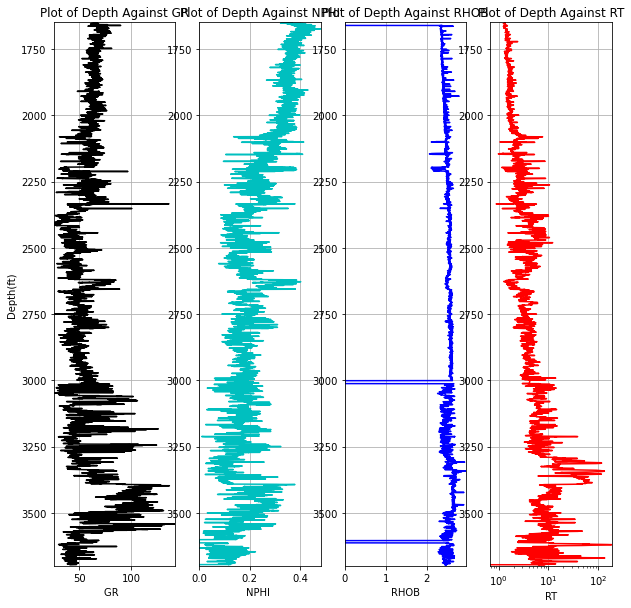

In [8]:
# visualizing the well logs with respect to the MD

pet.four_plots(logs=data, x1='GR', x2='NPHI', x3='RHOB', x4='RT', top=1650, base=3700, depth='DEPTH_MD')

### Data Preparation

In [9]:
# Encoding the categorical variables/logs in the data set

print(f'Shape of dataset before encoding: {data.shape}')
data['GROUP_encoded'] = data['GROUP'].astype('category')
data['GROUP_encoded'] = data['GROUP_encoded'].cat.codes 

data['FORMATION_encoded'] = data['FORMATION'].astype('category')
data['FORMATION_encoded'] = data['FORMATION_encoded'].cat.codes 

print(f'Shape of dataset after encoding: {data.shape}')

Shape of dataset before encoding: (13415, 19)
Shape of dataset after encoding: (13415, 21)


In [10]:
# dropping the categorical variables after encoding to prevent errors while trying to train the model

data = data.drop(['WELL', 'GROUP', 'FORMATION'], axis=1)

Below, we selected a portion of the data to represent the missing section. The Gamma Ray log will be used for this purpose. This section is selected and acts as the test data set. The test data set is removed from the full data set to give us the train data set. This is important to prevent **data leakage*.

In [11]:
# the test data set is selected from MD 950m to 1050m

testdata = data.loc[(data.DEPTH_MD >= 2400) & (data.DEPTH_MD <= 2500)]

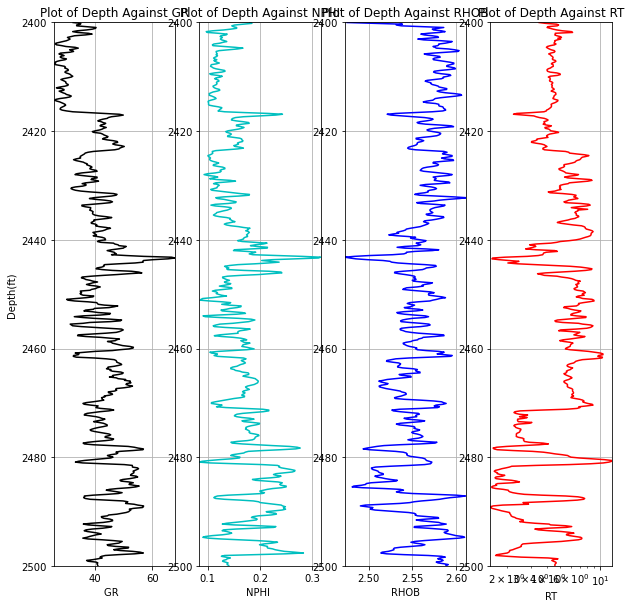

In [12]:
# visualizing the test data set

pet.four_plots(logs=testdata, x1='GR', x2='NPHI', x3='RHOB', x4='RT', top=2400, base=2500, depth='DEPTH_MD')

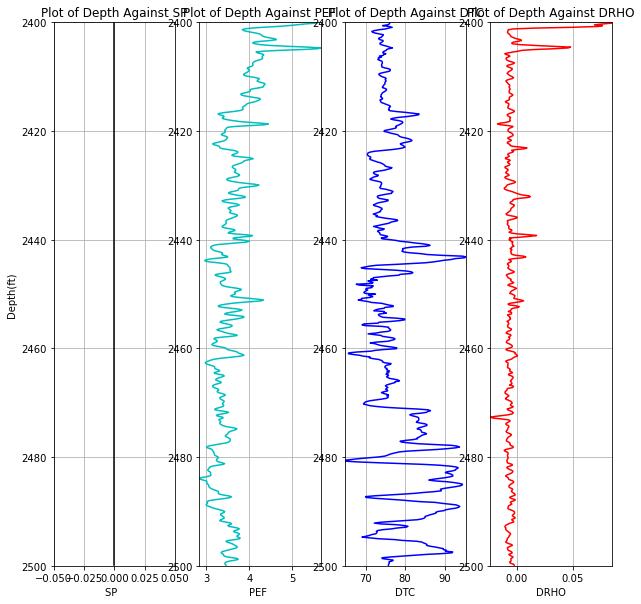

In [13]:
pet.four_plots(logs=testdata, x1='SP', x2='PEF', x3='DTC', x4='DRHO', top=2400, base=2500, depth='DEPTH_MD')

In [14]:
# checking the percentage of missing values in the test data set

(testdata.isna().sum()/testdata.shape[0])*100

DEPTH_MD               0.0
X_LOC                  0.0
Y_LOC                  0.0
Z_LOC                  0.0
CALI                   0.0
RMED                   0.0
RT                     0.0
RHOB                   0.0
GR                     0.0
NPHI                   0.0
PEF                    0.0
DTC                    0.0
SP                   100.0
ROP                    0.0
DRHO                   0.0
MUDWEIGHT            100.0
GROUP_encoded          0.0
FORMATION_encoded      0.0
dtype: float64

In [15]:
# creating the training data set

x_train1 = data.loc[(data.DEPTH_MD < 2400)]
x_train2 = data.loc[(data.DEPTH_MD > 2500)]
x_train = pd.concat((x_train1, x_train2))
x_train

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RT,RHOB,GR,NPHI,PEF,DTC,SP,ROP,DRHO,MUDWEIGHT,GROUP_encoded,FORMATION_encoded
119097,1652.640467,548458.9375,6822722.0,-1630.597168,12.344134,1.275498,1.356080,NaN,62.315960,0.359601,NaN,NaN,NaN,28.581408,NaN,NaN,1,3
119098,1652.792467,548458.9375,6822722.0,-1630.749146,12.719825,1.268749,1.322702,NaN,67.320236,0.367451,NaN,NaN,NaN,28.729593,NaN,NaN,1,3
119099,1652.944467,548458.9375,6822722.0,-1630.901123,13.729045,1.266472,1.302576,NaN,66.496498,0.333222,NaN,NaN,NaN,29.471582,NaN,NaN,1,3
119100,1653.096467,548458.9375,6822722.0,-1631.053101,13.111751,1.264930,1.298438,NaN,64.947311,0.321246,NaN,NaN,NaN,30.443291,NaN,NaN,1,3
119101,1653.248467,548458.9375,6822722.0,-1631.205078,12.859994,1.280805,1.309185,NaN,65.526405,0.335925,NaN,NaN,NaN,31.604027,NaN,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132507,3694.912467,547917.2500,6822794.5,-3555.816162,8.553368,9.208500,8.533600,2.461812,44.941212,NaN,4.882754,NaN,NaN,15.083316,0.105254,NaN,0,0
132508,3695.064467,547917.2500,6822794.5,-3555.966064,8.558637,9.208500,8.533600,2.475371,44.324474,NaN,4.906672,NaN,NaN,15.132172,0.105553,NaN,0,0
132509,3695.216467,547917.1875,6822794.5,-3556.116211,8.572794,9.208500,8.533600,2.481716,43.418758,NaN,4.934236,NaN,NaN,15.436068,0.101996,NaN,0,0
132510,3695.368467,NaN,NaN,NaN,8.598366,NaN,NaN,2.478641,42.353737,NaN,5.106630,NaN,NaN,15.783777,0.102644,NaN,0,0


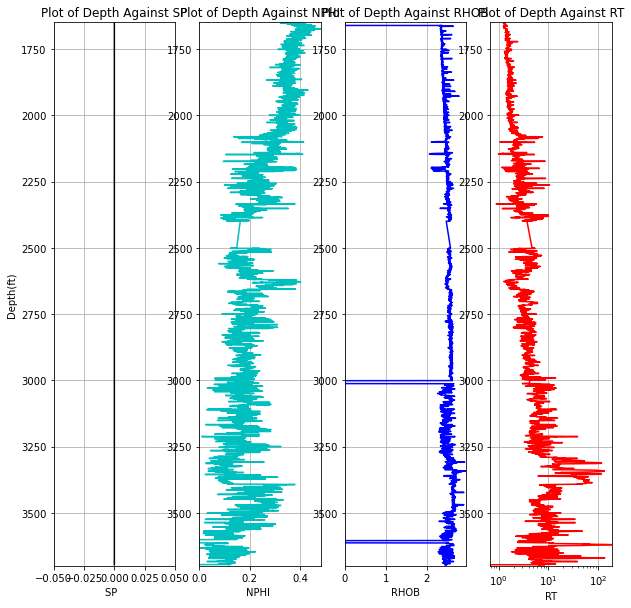

In [16]:
pet.four_plots(logs=x_train, x1='SP', x2='NPHI', x3='RHOB', x4='RT', top=1650, base=3700, depth='DEPTH_MD')

From the above, it could be seen that the portion corresponding to the test data section is represented by a straight line in the logs. This confirms that this section has been removed from our train data set as there are information corresponding to this depth in the train data set

In [17]:
(x_train.isna().sum()/x_train.shape[0]) * 100

DEPTH_MD               0.000000
X_LOC                  0.015678
Y_LOC                  0.015678
Z_LOC                  0.015678
CALI                   0.000000
RMED                   0.979854
RT                     0.015678
RHOB                   1.505056
GR                     0.000000
NPHI                   0.736850
PEF                    1.505056
DTC                    0.885788
SP                   100.000000
ROP                    0.000000
DRHO                   1.042565
MUDWEIGHT            100.000000
GROUP_encoded          0.000000
FORMATION_encoded      0.000000
dtype: float64

In [18]:
# creating the target label and removing it from the features log

y_train = x_train.GR
x_train = x_train.drop(['GR'], axis=1)

In [19]:
x_train.head(1)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RT,RHOB,NPHI,PEF,DTC,SP,ROP,DRHO,MUDWEIGHT,GROUP_encoded,FORMATION_encoded
119097,1652.640467,548458.9375,6822722.0,-1630.597168,12.344134,1.275498,1.35608,NaN,0.359601,NaN,NaN,NaN,28.581408,NaN,NaN,1,3


In [20]:
#The ML algorithm used in this tutorial does not accept missing values are input so there is a need to replace the missing values.

x_train.fillna(-9999, inplace=True)

### Model Training and Prediction

The algorithm used below is the Random Forest algorithm. The number of trees and maximum depth are set. Other hyperparameters are left as the default values and conditions.

In [21]:
np.random.seed(20)

In [22]:
rf = sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=20, verbose=2)
rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.5s finished


ExtraTreesRegressor(max_depth=20, verbose=2)

Now that the model has been trained, we can use this trained model to make predictions on the test data

In [23]:
# getting the testdata labels and dropping it from the data

labels = testdata.GR
testdata.drop('GR', axis=1, inplace=True)

In [24]:
testdata.shape, x_train.shape, labels.shape

((658, 17), (12757, 17), (658,))

In [25]:
testdata.fillna(-9999, inplace=True, axis=1)

In [26]:
pred = rf.predict(testdata)
pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([39.69988523, 41.37662525, 39.47438297, 36.11344251, 36.57787178,
       35.74137523, 39.18998164, 39.62197637, 37.954797  , 36.94641755,
       34.36554344, 34.06655827, 34.18221413, 36.22394847, 37.63299093,
       37.56575655, 36.73416751, 37.21581516, 37.21928815, 37.0505529 ,
       36.69053428, 36.49135354, 36.52666827, 37.29311999, 36.26241056,
       36.72852659, 34.16138109, 33.31023226, 33.01829386, 33.40835042,
       37.21130304, 39.91400779, 38.03942519, 34.93911818, 35.07952759,
       34.12831066, 34.23697804, 34.48765306, 34.72701099, 34.19167841,
       35.05548903, 34.93221428, 33.85160933, 33.51761517, 33.74138229,
       34.76929533, 33.93890889, 34.0790535 , 34.55518276, 35.51771408,
       34.30915741, 33.24204954, 33.38919979, 33.39494936, 33.40023981,
       33.73556227, 34.53846199, 35.43451099, 35.36787447, 35.79434363,
       35.16825988, 34.36554547, 34.40084956, 33.96240957, 36.55733544,
       35.72025629, 35.83079879, 34.65207826, 34.37146415, 35.00

In [27]:
# outputing some of the actual labels and predicted values 

np.array(labels[300:310]), pred[300:310]

(array([45.99598312, 52.68849564, 55.17926025, 56.33842087, 51.63699722,
        47.72036743, 42.83681107, 38.65997315, 35.45903397, 35.19842148]),
 array([42.34223534, 47.75614912, 50.22221166, 50.83711924, 50.84735722,
        49.6607562 , 45.78231448, 38.91217955, 39.14801397, 38.55228987]))

### Model Evaluation

The r2 score, root mean square error and mean squared log error are used in evaluating the predictions

In [28]:
sklm.r2_score(labels, pred)

0.727132291620251

In [29]:
(sklm.mean_squared_error(pred, labels)) ** 0.5

3.9765667196697927

In [30]:
sklm.mean_squared_log_error(pred, labels)

0.009961671150851548

While the rmse magnitude is considerably minimal, the correlation coefficient is barely halfly correlated. Further model tuning, careful data selection for training and preparation would improve model performance.

In [31]:
testdata['pred'] = pred
testdata['GR'] = labels

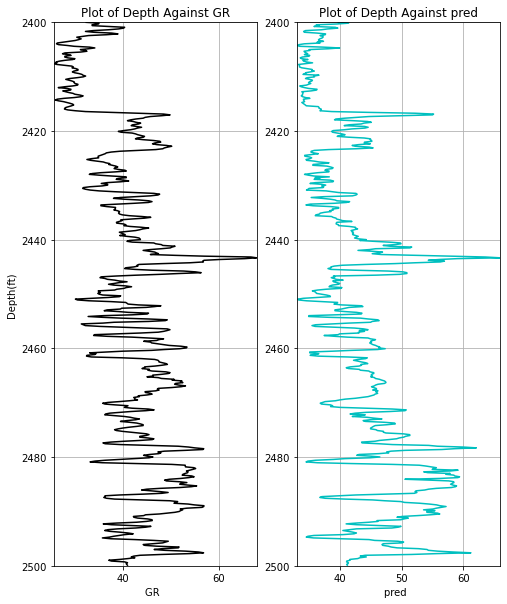

In [32]:
pet.two_plots(logs=testdata, x1='GR', x2='pred',  top=2400, base=2500, depth='DEPTH_MD')

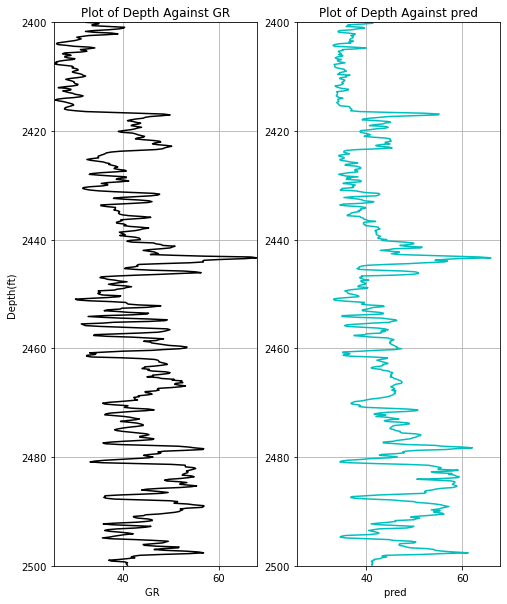

In [33]:
pet.two_plot(logs=testdata, x1='GR', x2='pred',  top=2400, base=2500, depth='DEPTH_MD', scale=True)

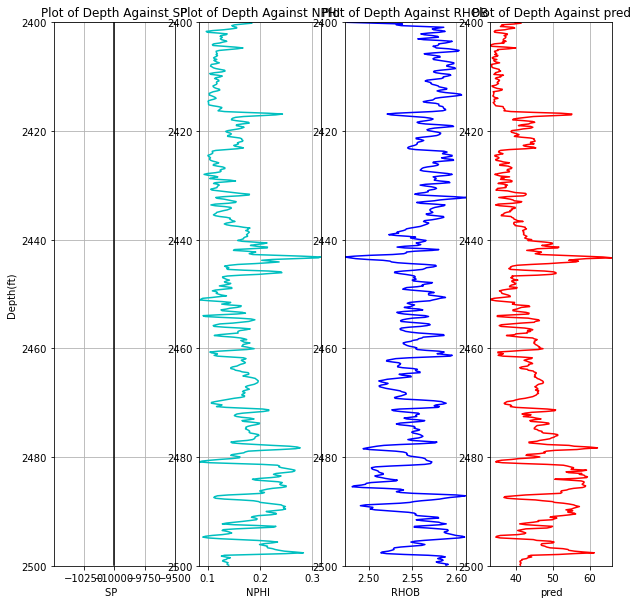

In [34]:
pet.four_plots(logs=testdata, x1='SP', x2='NPHI', x3='RHOB', x4='pred', top=2400, base=2500, depth='DEPTH_MD')

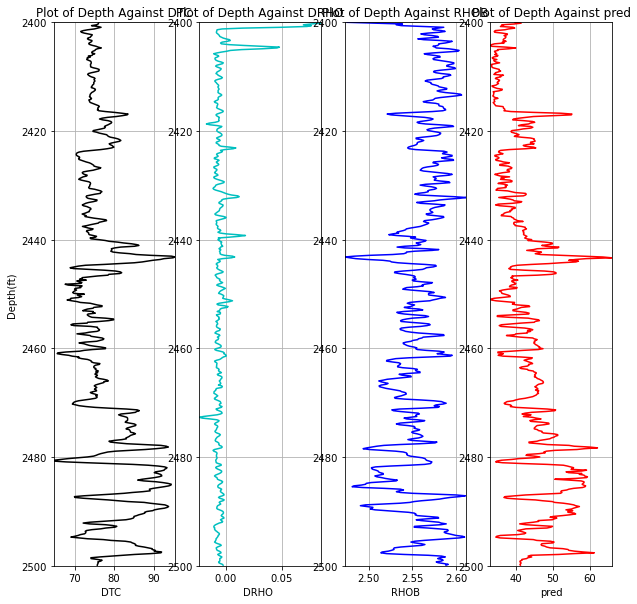

In [35]:
pet.four_plots(logs=testdata, x1='DTC', x2='DRHO', x3='RHOB', x4='pred', top=2400, base=2500, depth='DEPTH_MD')

The other part of the tutorial below shows the performance when just a section of the data set closer to the missing section is used for training the model. This demonstrates the importance of carefully preparaing the training data for the model.

In [36]:
x_train['GR'] = labels
labels

124014    32.314774
124015    34.998203
124016    34.881245
124017    33.532253
124018    33.571491
            ...    
124667    40.347809
124668    40.945225
124669    40.668026
124670    40.771992
124671    40.933487
Name: GR, Length: 658, dtype: float64

In [37]:
x_train1 = data.loc[(data.DEPTH_MD > 2250) & (data.DEPTH_MD < 2400)]
x_train2 = data.loc[(data.DEPTH_MD > 2500) & (data.DEPTH_MD < 2750)]
x_train_new = pd.concat((x_train1, x_train2))
x_train_new

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RT,RHOB,GR,NPHI,PEF,DTC,SP,ROP,DRHO,MUDWEIGHT,GROUP_encoded,FORMATION_encoded
123027,2250.000467,548421.1875,6822773.5,-2221.569824,12.520729,2.293115,2.306006,2.518722,67.911675,0.259878,2.882096,90.733833,NaN,15.519140,-0.007170,NaN,1,3
123028,2250.152467,548421.1875,6822773.5,-2221.717041,12.542151,2.288348,2.290444,2.517516,65.731819,0.262599,2.859426,89.707840,NaN,15.924591,-0.007233,NaN,1,3
123029,2250.304467,548421.1250,6822773.5,-2221.864258,12.527334,2.314326,2.295860,2.518442,66.618950,0.269671,2.848188,88.227699,NaN,16.964855,-0.006526,NaN,1,3
123030,2250.456467,548421.1250,6822773.5,-2222.011719,12.514700,2.503129,2.487850,2.525165,68.654427,0.272790,2.879689,86.768021,NaN,18.644161,-0.006427,NaN,1,3
123031,2250.608467,548421.1250,6822773.5,-2222.158936,12.518229,2.865811,2.887764,2.541265,67.628487,0.261441,2.984622,85.851738,NaN,21.168121,-0.007016,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126312,2749.320467,548250.8125,6822817.0,-2684.288574,12.711064,4.088662,4.110091,2.580138,52.868362,0.158120,3.666281,75.989754,NaN,19.170645,-0.007120,NaN,1,5
126313,2749.472467,548250.6875,6822817.0,-2684.417969,12.708600,4.174857,4.210448,2.589173,47.085678,0.126868,3.790588,74.565025,NaN,19.002472,-0.005861,NaN,1,5
126314,2749.624467,548250.6250,6822817.0,-2684.547607,12.715039,4.467253,4.467443,2.602685,36.984932,0.100794,4.009563,72.290085,NaN,18.538853,-0.004598,NaN,1,5
126315,2749.776467,548250.5625,6822817.0,-2684.677002,12.726008,4.778697,4.780671,2.612479,29.921129,0.089194,4.204753,71.318535,NaN,16.118435,-0.004649,NaN,1,5


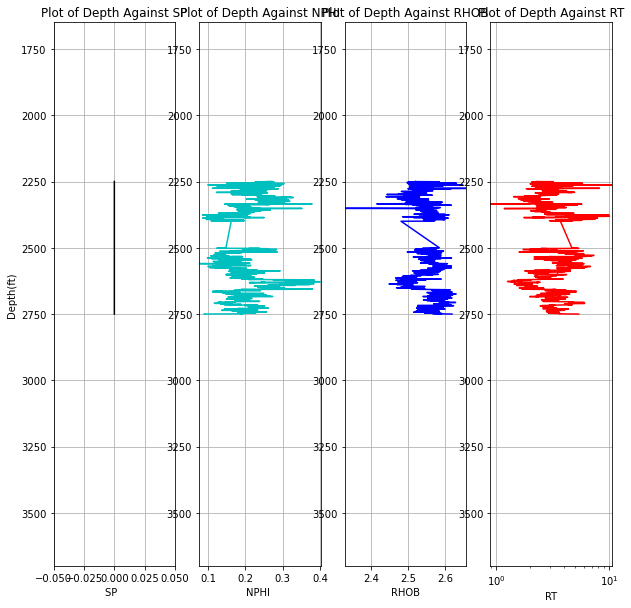

In [38]:
pet.four_plots(logs=x_train_new, x1='SP', x2='NPHI', x3='RHOB', x4='RT', top=1650, base=3700, depth='DEPTH_MD')

In [39]:
labels = x_train_new.GR  # the new labels for the train data

In [40]:
x_train2 = x_train_new.drop('GR', axis=1)

In [41]:
x_train2.fillna(-9999, inplace=True, axis=1)

In [42]:
rf = sklearn.ensemble.ExtraTreesRegressor(n_estimators=100, max_depth=20, verbose=2)
rf.fit(x_train2, labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


ExtraTreesRegressor(max_depth=20, verbose=2)

In [43]:
pred = rf.predict(testdata.drop(['GR', 'pred'], axis=1))
pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([39.08701157, 42.2217899 , 39.58254612, 36.50822071, 36.14806093,
       36.25297735, 38.91162269, 40.26138548, 38.90347288, 37.5938224 ,
       34.18378248, 33.85335419, 33.94838556, 35.16789366, 37.41312006,
       38.15453932, 36.10932796, 36.08643831, 37.30277666, 35.84409378,
       35.8550156 , 35.92210348, 37.04941103, 37.72040167, 36.59530376,
       35.7548761 , 33.85304226, 32.81543695, 32.10081697, 34.5260582 ,
       36.74578688, 39.23486126, 37.90867464, 35.66986458, 34.96195311,
       34.65015623, 34.5814547 , 34.4901951 , 35.21441299, 34.61468735,
       35.08008289, 34.71759338, 34.04926344, 33.6080335 , 33.82597462,
       34.5395363 , 33.47489567, 34.09492649, 34.90901121, 35.14957493,
       34.57614475, 33.43928543, 33.29202261, 33.82120638, 33.72666655,
       33.59206623, 34.6209045 , 35.70090268, 35.53906422, 35.85522512,
       35.78968795, 33.89667515, 34.34716005, 34.1147809 , 35.74878784,
       36.03756574, 35.47536566, 33.93510412, 33.42814564, 34.16

In [44]:
labels = testdata.GR
np.array(labels[300:310]), pred[300:310]

(array([45.99598312, 52.68849564, 55.17926025, 56.33842087, 51.63699722,
        47.72036743, 42.83681107, 38.65997315, 35.45903397, 35.19842148]),
 array([42.81679342, 48.43539877, 51.65456413, 51.40277699, 50.72127794,
        50.40110061, 45.29462244, 39.39701464, 39.06596125, 38.91160178]))

In [45]:
sklm.r2_score(labels, pred)

0.7289555294988261

In [46]:
(sklm.mean_squared_error(pred, labels)) ** 0.5

3.963259211018869

In [47]:
testdata['pred'] = pred
testdata['GR'] = labels

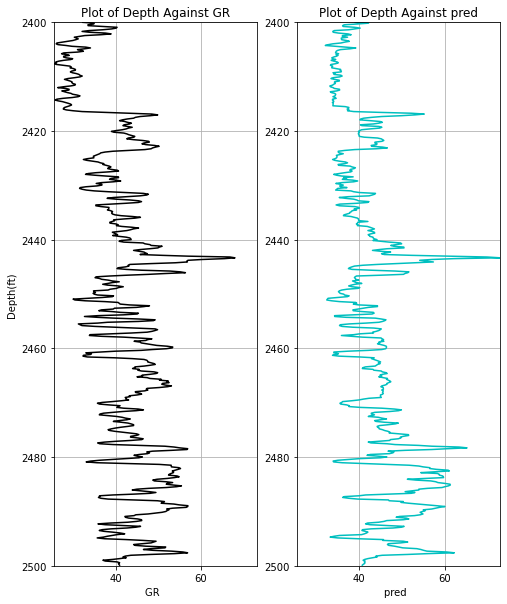

In [48]:
pet.two_plot(logs=testdata, x1='GR', x2='pred',  top=2400, base=2500, depth='DEPTH_MD', scale=True)

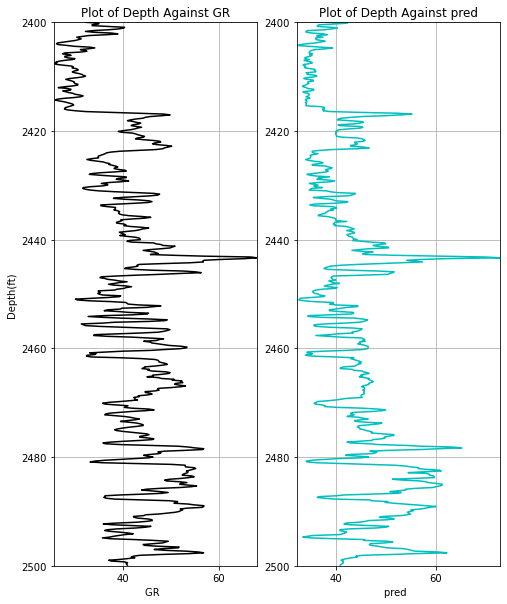

In [49]:
pet.two_plots(logs=testdata, x1='GR', x2='pred',  top=2400, base=2500, depth='DEPTH_MD')

The above results show a better (negligible) performance compared to the previous example. Better data selection (sections and logs) will help in making better model performance. Although, performance may also be due to other factors.